# Predicting House Prices - Data Processing
- Created by: Bach Khoi Vo
- - -
## Import relevant modules

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Read raw data 

In [2]:
raw_data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv', index_col=0)
raw_data.reset_index(drop=True, inplace=True)
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Take a brief overview of the data

First, examining data type of each columns

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

As the result above, datetime type does not exist in our data

In [4]:
raw_data.shape

(1460, 80)

Then, trying to explore **numerical** data

In [5]:
raw_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Next, **categorical** data

In [6]:
raw_data.describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


- - -
## Data Analysis :D
### SalePrice column

Our target is `SalePrice`, so let's examine it first.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

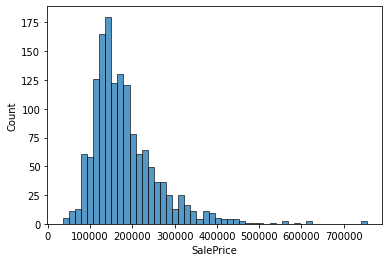

In [7]:
sns.histplot(data=raw_data, x='SalePrice', bins=50)

Oh no :( It seems that our `SalePrice` is skewed to the right. Hence, let's try to apply a *log transformation*

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

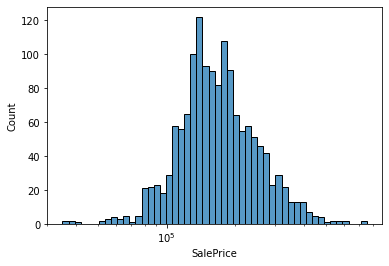

In [8]:
sns.histplot(data=raw_data, x='SalePrice', bins=50, log_scale=True)

In [9]:
# Make a copy before editing 
df = raw_data.copy()

In [10]:
df['SalePrice'] = np.log(df['SalePrice'])

Text(0.5, 1.0, 'Box plot')

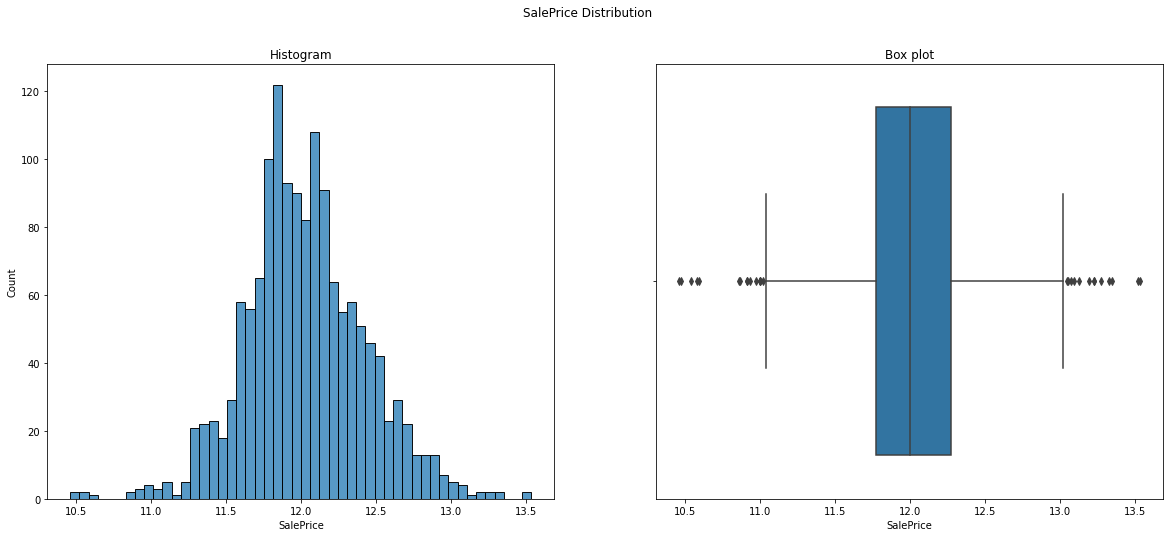

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('SalePrice Distribution')
sns.histplot(ax=axs[0], data=df, x='SalePrice', bins=50)
sns.boxplot(ax=axs[1], data=df, x='SalePrice')
axs[0].set_title('Histogram')
axs[1].set_title('Box plot')

As the illustration above, we can clearly see that there are some *outliers* in our data :| So, we need to see other features to make sure that these observations are *real outliers* or not.

In [12]:
df['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [13]:
df[(df['SalePrice'] > 13.4) | (df['SalePrice'] < 10.7)].sort_values('SalePrice')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,10.460242
916,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,10.471950
968,50,RM,50.0,5925,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2009,WD,Abnorml,10.542706
533,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,10.578980
30,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,10.596635
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,13.521139
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,13.534473


As the result above, I do not figure out any outlier in the Target column, so we do not change anything so far.

### Skewed Data 

Let's take a look at our numerical columns to see that How much each of them skewed?

In [24]:
skewed_df = df.skew(axis=0, skipna=True, numeric_only=True).sort_values(ascending=False)
skewed_df

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
SalePrice         0.121335
YrSold            0.096269
FullBath          0.036562
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
GarageYrBlt      -0.649415
d

In [27]:
skewed_col = skewed_df.index.to_list()
skewed_col

['MiscVal',
 'PoolArea',
 'LotArea',
 '3SsnPorch',
 'LowQualFinSF',
 'KitchenAbvGr',
 'BsmtFinSF2',
 'ScreenPorch',
 'BsmtHalfBath',
 'EnclosedPorch',
 'MasVnrArea',
 'OpenPorchSF',
 'LotFrontage',
 'BsmtFinSF1',
 'WoodDeckSF',
 'TotalBsmtSF',
 'MSSubClass',
 '1stFlrSF',
 'GrLivArea',
 'BsmtUnfSF',
 '2ndFlrSF',
 'OverallCond',
 'TotRmsAbvGrd',
 'HalfBath',
 'Fireplaces',
 'BsmtFullBath',
 'OverallQual',
 'MoSold',
 'BedroomAbvGr',
 'GarageArea',
 'SalePrice',
 'YrSold',
 'FullBath',
 'GarageCars',
 'YearRemodAdd',
 'YearBuilt',
 'GarageYrBlt']

and Plot them in **Histogram**

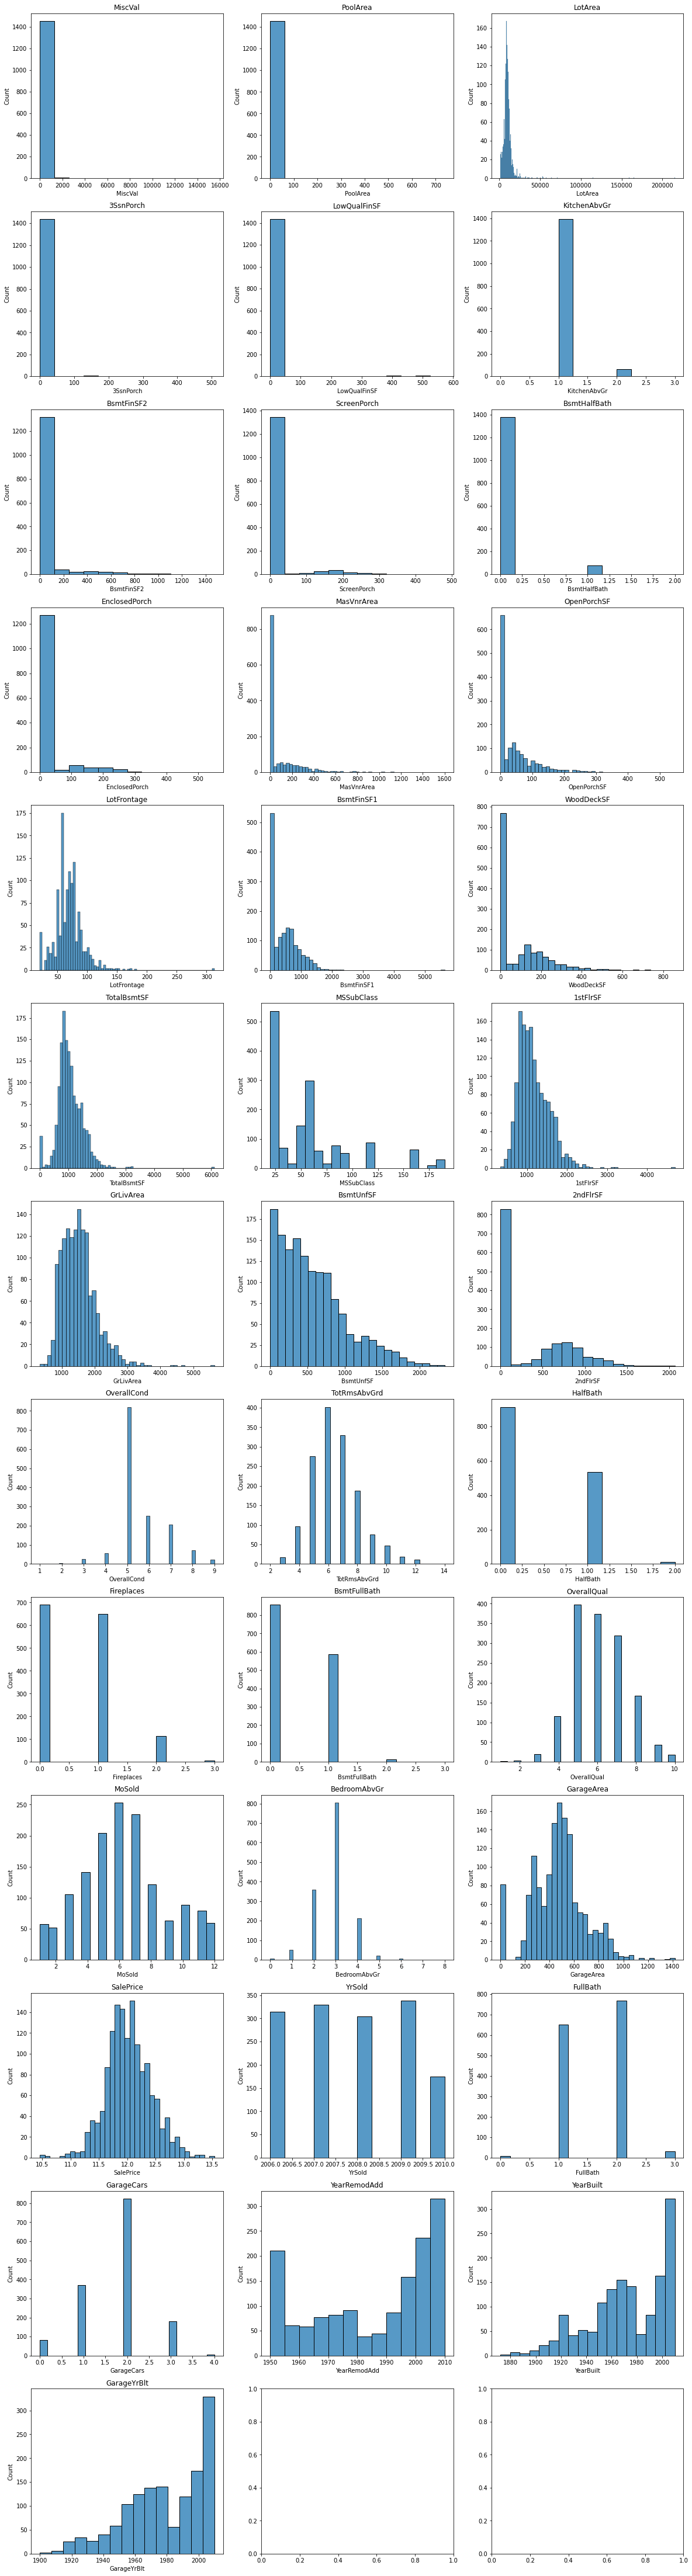

In [40]:
fig, axs = plt.subplots(13, 3, figsize=(20, 80),sharex=False, sharey=False)
for i in range(14):
    for j in range(3):
        if i * 3 + j >= 37: break
        sns.histplot(ax=axs[i, j], data = df, x=skewed_col[i * 3 + j])
        axs[i, j].set_title(skewed_col[i*3+j])

### Correlation

#### Numerical features

We only wanna see correlation between our Target - `SalePrice` and other features, so let make a list of correlation coefficient and visualize it via Correlation Matrix for intuition :D :D

In [111]:
df.corr(method='pearson')['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

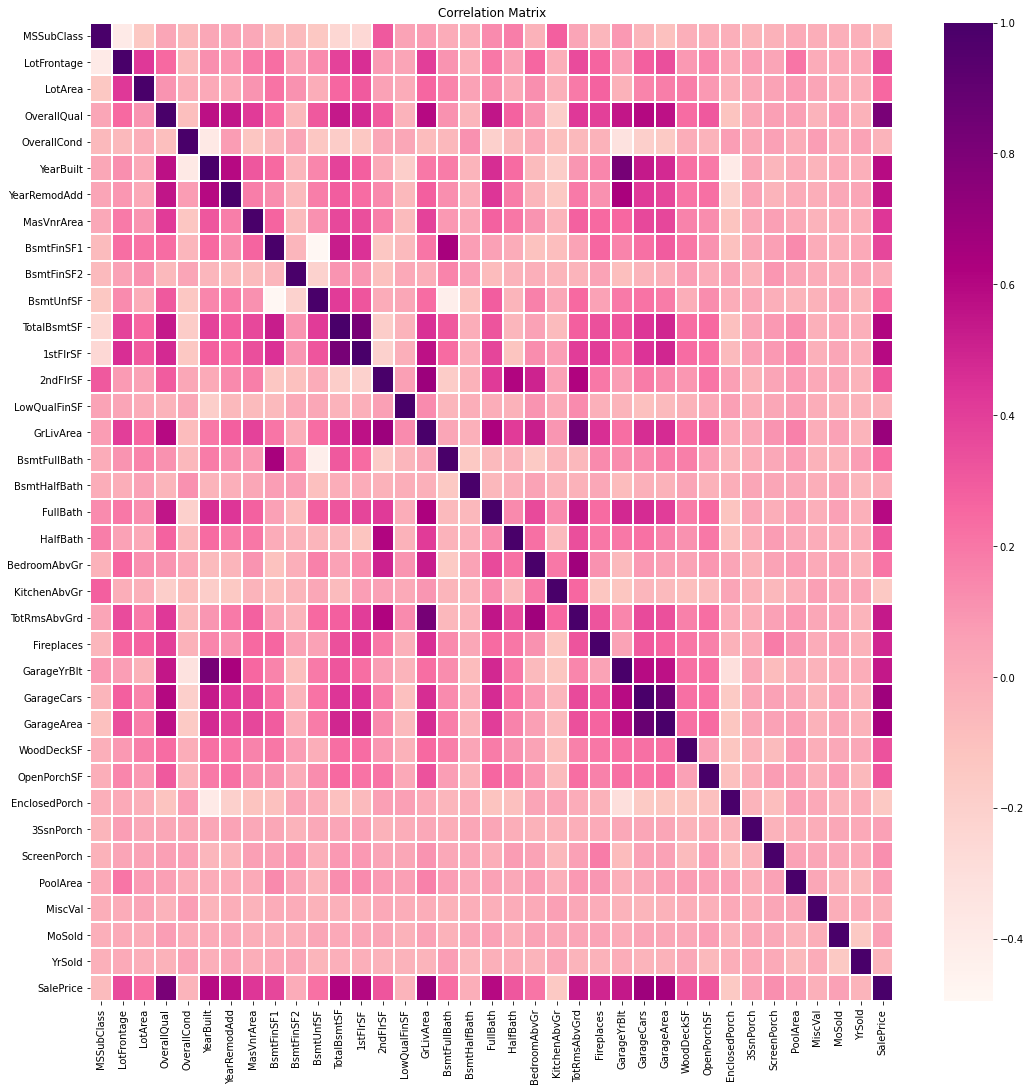

In [112]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=df.corr(method='pearson'), cmap='RdPu', linewidths=1, annot=False, robust=False)
plt.title('Correlation Matrix')
plt.show()

Before ploting, I would filter out all *numerical features* from our data :D

In [113]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()
num_df = pd.melt(num_df, id_vars=['SalePrice'])
num_df.head()

,SalePrice,variable,value
0,12.247694,MSSubClass,60.0
1,12.109011,MSSubClass,20.0
2,12.317167,MSSubClass,60.0
3,11.849398,MSSubClass,70.0
4,12.429216,MSSubClass,60.0


In [114]:
def FacetGrid_RegPlot(x, y, **kwargs):
    sns.regplot(x=x, y=y, ci=95, scatter_kws={'alpha':0.3, 's':50})

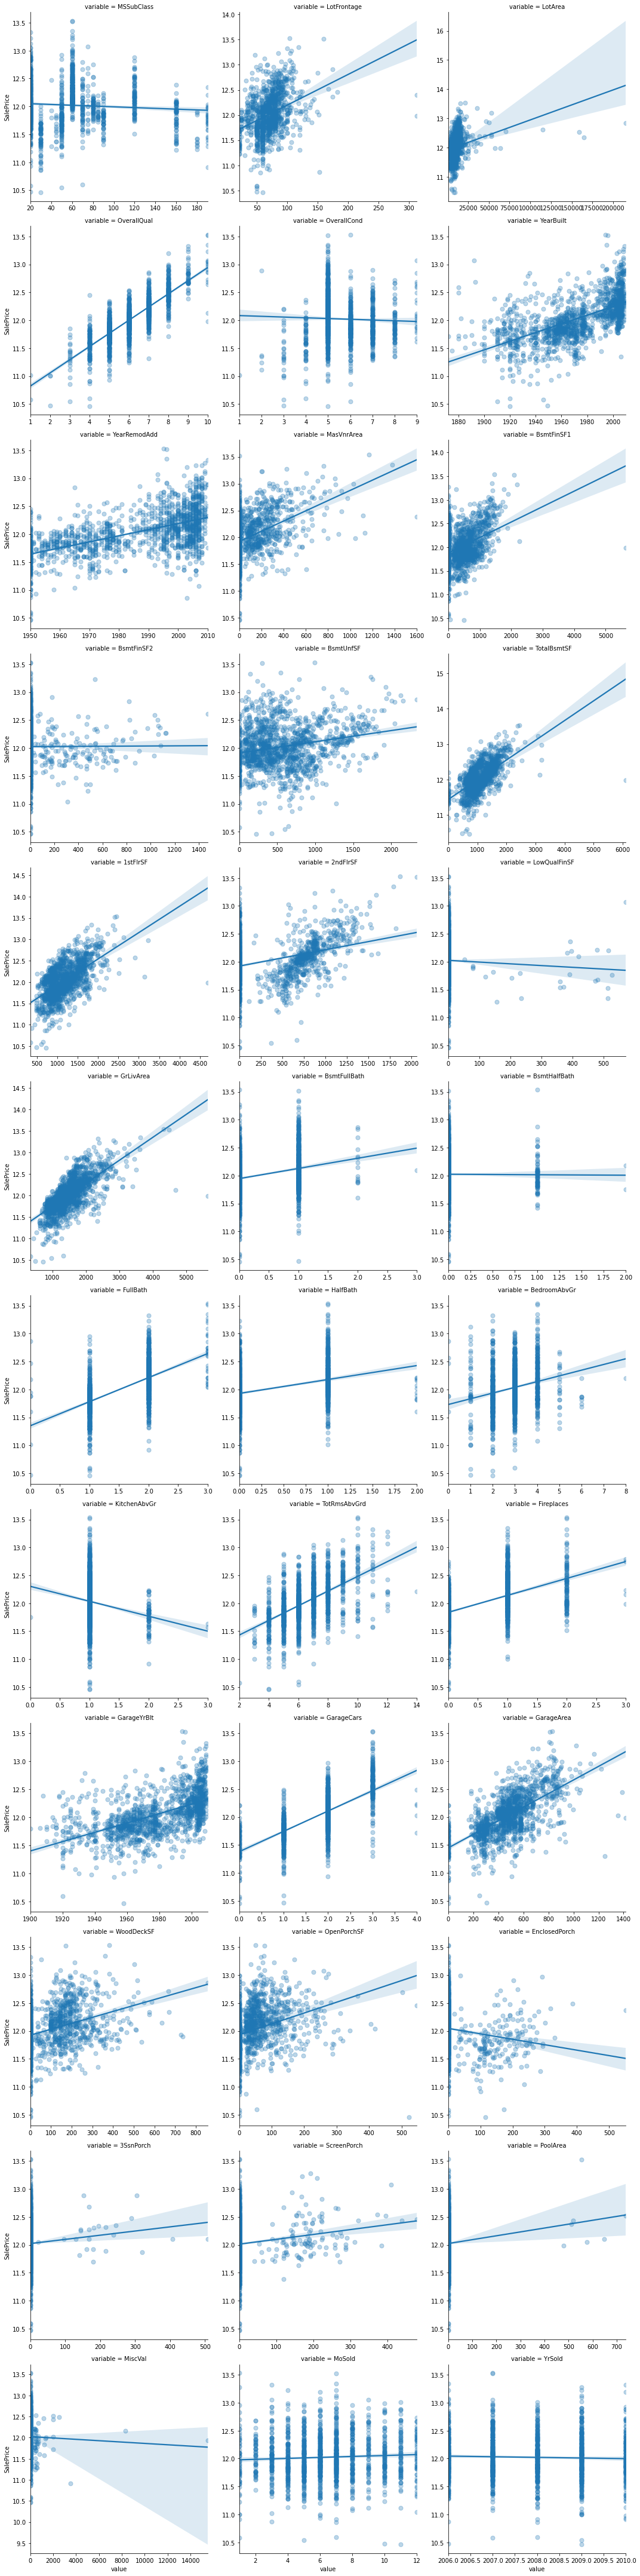

In [115]:
g = sns.FacetGrid(num_df, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g.map(FacetGrid_RegPlot, 'value', 'SalePrice')

So, we would remove some trivial columns from the dataset, in particular columns which have **|corr coef| < 0.1**

In [116]:
trivial_num_cols = ['MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 
                'YrSold', 'LowQualFinSF', 'OverallCond', 'MSSubClass', 'BsmtFullBath', 
                'BedroomAbvGr', 'HalfBath']

#### Categorical features

Before ploting, I would filter out all *categorical features* from our data :D

In [117]:
cat_df = df.select_dtypes(exclude=['int64', 'float64']).copy()
cat_df = pd.melt(df, id_vars='SalePrice', value_vars=df[cat_df.columns])
cat_df.head()

,SalePrice,variable,value
0,12.247694,MSZoning,RL
1,12.109011,MSZoning,RL
2,12.317167,MSZoning,RL
3,11.849398,MSZoning,RL
4,12.429216,MSZoning,RL


In [118]:
def FacetGrid_BoxPlot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

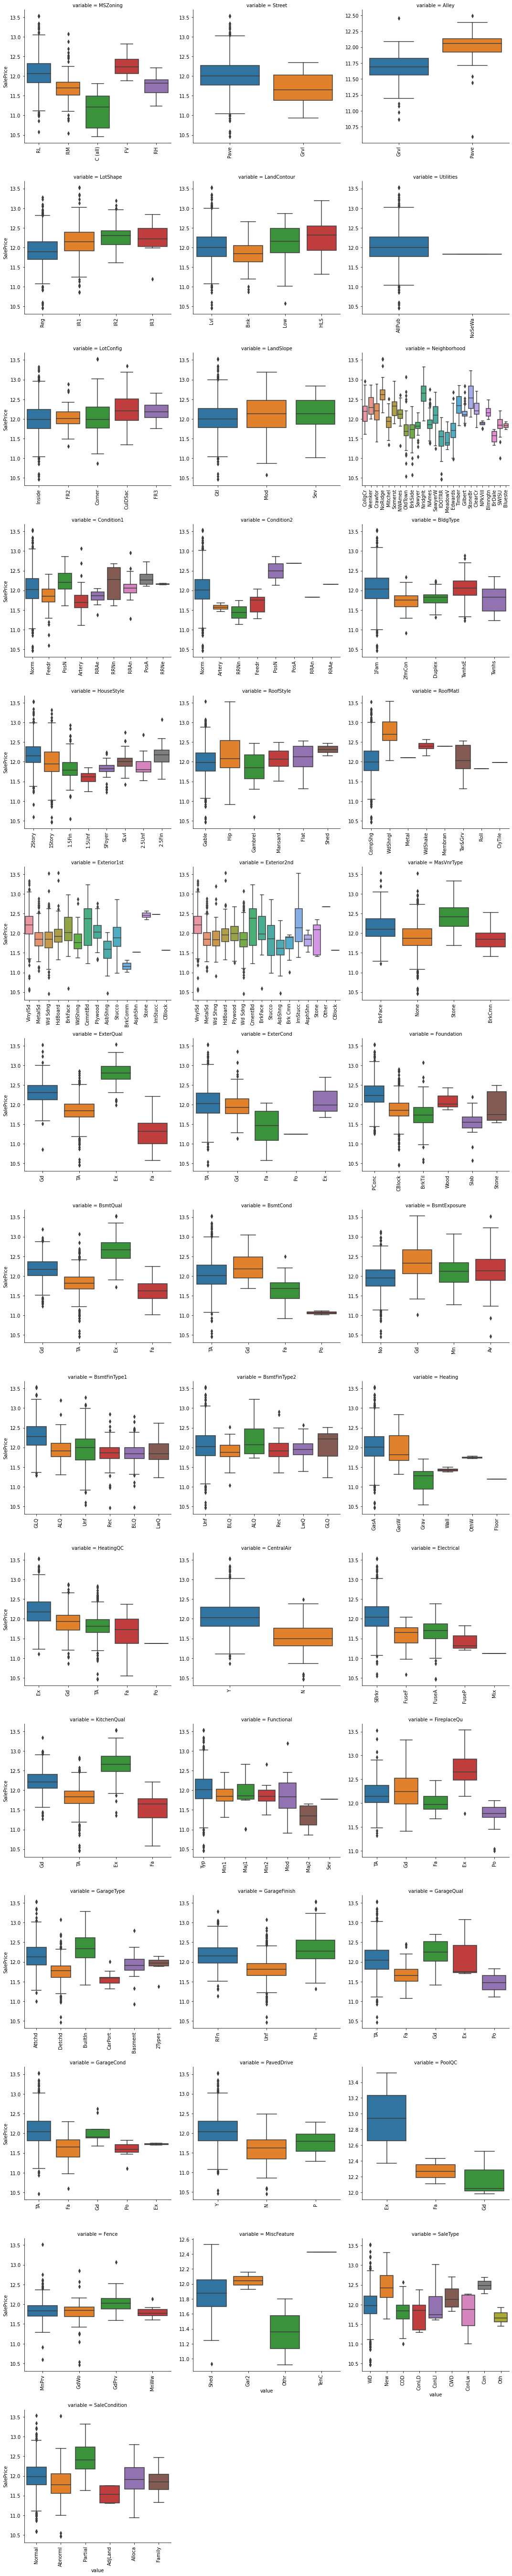

In [119]:
g = sns.FacetGrid(cat_df, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g.map(FacetGrid_BoxPlot, 'value', 'SalePrice')

In [120]:
trivial_cat_cols = ['Utilities', 'LotConfig', 'LandSlope', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 
                    'GarageCond', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'BldgType']

So far so good, We have chosen some *trivial columns* that need to be removed from our dataset, so let's remove them and then move to the next step *handling missing values and encode categorical values*.

In [121]:
trivial_cols = trivial_num_cols + trivial_cat_cols
trivial_cols

['MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'YrSold',
 'LowQualFinSF',
 'OverallCond',
 'MSSubClass',
 'BsmtFullBath',
 'BedroomAbvGr',
 'HalfBath',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageCond',
 'Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'BldgType']

In [122]:
cleaned_df = df.drop(labels=trivial_cols, axis=1, inplace=False)
cleaned_df.shape

(1460, 57)

In [123]:
cleaned_df.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,567.240411,1057.429452,1162.626712,...,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,2.758904,12.024051
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,441.866955,438.705324,386.587738,...,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,40.177307,0.399452
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.460242
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,11.775097
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,12.001505
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,...,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,12.273731
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,...,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,738.000000,13.534473


## Handling with Missing Values

Before doing anything, Saving a checkpoint at first :v

In [124]:
nonmv_df = cleaned_df.copy()
nonmv_df.head()

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Condition1,Condition2,HouseStyle,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,NaN,Reg,Lvl,Norm,Norm,2Story,...,61,0,0,0,NaN,NaN,NaN,WD,Normal,12.247694
1,RL,80.0,9600,Pave,NaN,Reg,Lvl,Feedr,Norm,1Story,...,0,0,0,0,NaN,NaN,NaN,WD,Normal,12.109011
2,RL,68.0,11250,Pave,NaN,IR1,Lvl,Norm,Norm,2Story,...,42,0,0,0,NaN,NaN,NaN,WD,Normal,12.317167
3,RL,60.0,9550,Pave,NaN,IR1,Lvl,Norm,Norm,2Story,...,35,272,0,0,NaN,NaN,NaN,WD,Abnorml,11.849398
4,RL,84.0,14260,Pave,NaN,IR1,Lvl,Norm,Norm,2Story,...,84,0,0,0,NaN,NaN,NaN,WD,Normal,12.429216


Firstly, we need to demonstrate how impact of the missing values on our dataset.

In [125]:
# Percentage of missing values of each columns
percent_mv_df = pd.DataFrame(columns=('Column', 'Missing value'))
for col in cleaned_df.columns:
    percent_mv_df = percent_mv_df.append({'Column':col, 'Missing value':cleaned_df[col].isnull().sum()/cleaned_df.shape[0] * 100}, 
                          ignore_index=True)
percent_mv_df.sort_values(by='Missing value', ascending=False, inplace=True)
percent_mv_df.drop(labels=percent_mv_df[percent_mv_df['Missing value']==0].index, axis=0, inplace=True)
percent_mv_df.reset_index(inplace=True, drop=True)
percent_mv_df

,Column,Missing value
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageQual,5.547945
7,GarageType,5.547945
8,GarageYrBlt,5.547945
9,GarageFinish,5.547945


First of all, we must concentrate on the **four bigs** [`PoolQC`, `MiscFeature`, `Alley`, `Fence`]. As the description data file said, whole these columns have `NaN` values that stand for `None`. So, we do not need to drop them, but instead, replace all missing values in these columns with `None` values.

In [126]:
nonmv_df['PoolQC'].fillna(value='None', inplace=True)
nonmv_df['MiscFeature'].fillna(value='None', inplace=True)
nonmv_df['Alley'].fillna(value='None', inplace=True)
nonmv_df['Fence'].fillna(value='None', inplace=True)

In [127]:
nonmv_df[['PoolQC', 'MiscFeature', 'Alley', 'Fence']].isna().sum()

PoolQC         0
MiscFeature    0
Alley          0
Fence          0
dtype: int64

Then, we need to remove some rows that do has the columns that do not meet 0.1% of missing value. [`Electrical`]

In [128]:
nonmv_df.drop(labels=nonmv_df[nonmv_df['Electrical'].isnull()].index, axis=0, inplace=True)

In the next step, we classify our *missing value* columns into 2 groups: numerical and categorical, then we apply some specific methods for each group.

In [129]:
# Numerical columns
mv_num_col = [col for col in nonmv_df.select_dtypes(include=('int64', 'float64')).columns if col in percent_mv_df['Column'].to_list()]
mv_num_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [130]:
# Categorical columns
mv_cat_col = [col for col in nonmv_df.select_dtypes(exclude=('int64', 'float64')).columns if col in percent_mv_df['Column'].to_list()]
# We already handled Electrical, so we must remove each before doing anything
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Electrical']:
    mv_cat_col.remove(col)
mv_cat_col

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual']

Yeah, It looks like there are some relationship between these columns, let's figure out it
- **Garage**: `GarageType`, `GarageFinish`, `GarageQual`, `GarageYrBlt` $\gets$ `GarageArea`, `GarageCars`
- **Bsmt**: `BsmtQual`, `BsmtCond` $\gets$ `TotalBsmtSF`
- **MasVnr**: `MasVnrType` $\gets$ `MasVnrArea`
- **Fireplace**: `FireplaceQu` $\gets$ `Fireplaces`
- **LotFrontage**: `LotFrontage`

### LotFrontage

In [131]:
nonmv_df['LotFrontage'].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [132]:
nonmv_df[nonmv_df['LotFrontage'].isnull()]

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Condition1,Condition2,HouseStyle,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
7,RL,NaN,10382,Pave,None,IR1,Lvl,PosN,Norm,2Story,...,204,228,0,0,None,None,Shed,WD,Normal,12.206073
12,RL,NaN,12968,Pave,None,IR2,Lvl,Norm,Norm,1Story,...,0,0,176,0,None,None,None,WD,Normal,11.877569
14,RL,NaN,10920,Pave,None,IR1,Lvl,Norm,Norm,1Story,...,213,176,0,0,None,GdWo,None,WD,Normal,11.964001
16,RL,NaN,11241,Pave,None,IR1,Lvl,Norm,Norm,1Story,...,0,0,0,0,None,None,Shed,WD,Normal,11.911702
24,RL,NaN,8246,Pave,None,IR1,Lvl,Norm,Norm,1Story,...,90,0,0,0,None,MnPrv,None,WD,Normal,11.944708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,RL,NaN,12546,Pave,None,IR1,Lvl,Norm,Norm,1Story,...,0,99,0,0,None,None,None,WD,Normal,12.116695
1431,RL,NaN,4928,Pave,None,IR1,Lvl,Norm,Norm,1Story,...,60,0,0,0,None,None,None,WD,Normal,11.875831
1441,RM,NaN,4426,Pave,None,Reg,Lvl,Norm,Norm,1Story,...,0,0,0,0,None,None,None,WD,Normal,11.913713
1443,RL,NaN,8854,Pave,None,Reg,Lvl,Norm,Norm,1.5Unf,...,98,0,40,0,None,None,None,WD,Normal,11.703546


As the data description said that: "*LotFrontage: Linear feet of street connected to property*", we can clearly determine that the *minimum of LotFrontage* is **0**, but as the result above shows that **min = 21**, hence we can conclude that `NaN` stands for **0**. So, to handle missing values in *LotFrontage*, we simply replace the *missing values* with **0**.

In [133]:
nonmv_df['LotFrontage'].fillna(value=0, inplace=True)
nonmv_df['LotFrontage'].describe()

count    1459.000000
mean       57.612748
std        34.673850
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [134]:
nonmv_df['LotFrontage'].isnull().sum()

0

### Fireplaces 

In [135]:
nonmv_df.loc[nonmv_df['FireplaceQu'].isna(), ['Fireplaces', 'FireplaceQu']]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


Yeah, no need to say, we would replace the *missing values* with **None** (string) because this column's type is *categorical*.

In [136]:
nonmv_df['FireplaceQu'].fillna(value='None', inplace=True)
nonmv_df[['Fireplaces', 'FireplaceQu']].describe(include='all')

,Fireplaces,FireplaceQu
count,1459.000000,1459
unique,NaN,6
top,NaN,None
freq,NaN,689
mean,0.613434,NaN
std,0.644687,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN


### MasVnr

In [137]:
nonmv_df[['MasVnrArea', 'MasVnrType']].describe(include='all')

,MasVnrArea,MasVnrType
count,1451.00000,1451
unique,NaN,4
top,NaN,None
freq,NaN,863
mean,103.75672,NaN
std,181.10815,NaN
min,0.00000,NaN
25%,0.00000,NaN
50%,0.00000,NaN
75%,166.00000,NaN


In [138]:
nonmv_df.loc[nonmv_df['MasVnrType'].isna(), ['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


Omg, why this dumb thing happened :| The fanciest thing I would do to handling the missing values for these columns is that replace them with **0** in `MasVnrArea` and **None** in `MasVnrType`, cause it seems that no *Masonry veneer* exists in those places.

In [139]:
nonmv_df['MasVnrArea'].fillna(value=0, inplace=True)
nonmv_df['MasVnrType'].fillna(value='None', inplace=True)

In [140]:
nonmv_df[['MasVnrArea', 'MasVnrType']].describe(include='all')

,MasVnrArea,MasVnrType
count,1459.000000,1459
unique,NaN,4
top,NaN,None
freq,NaN,871
mean,103.187800,NaN
std,180.773158,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,164.500000,NaN


### Bsmt

As the data description has been described, `Nan`s in these **Bsmt** columns stands for there are no basement. Therefore, we replace those *missing values* with **None**.

In [141]:
nonmv_df.loc[nonmv_df['BsmtQual'].isna(), ['BsmtQual', 'BsmtCond']]

,BsmtQual,BsmtCond
17,NaN,NaN
39,NaN,NaN
90,NaN,NaN
102,NaN,NaN
156,NaN,NaN
182,NaN,NaN
259,NaN,NaN
342,NaN,NaN
362,NaN,NaN
371,NaN,NaN


In [142]:
nonmv_df.loc[nonmv_df['BsmtQual'].isna(), ['BsmtQual', 'BsmtCond']] = 'None'

### Garage

All garage columns have the same percentage of missing values, thus it kinda said that there is a strong relationship between them. Let's figure out it :D

In [143]:
nonmv_df.loc[nonmv_df['GarageQual'].isna(), ['GarageType', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageArea', 'GarageCars']]

,GarageType,GarageFinish,GarageQual,GarageYrBlt,GarageArea,GarageCars
39,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,0,0


In [144]:
nonmv_df.loc[nonmv_df['GarageQual'].isna(), ['GarageType', 'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GarageArea', 'GarageCars']].describe(include='all')

,GarageType,GarageFinish,GarageQual,GarageYrBlt,GarageArea,GarageCars
count,0,0,0,0.0,81.0,81.0
unique,0,0,0,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.0,0.0
std,NaN,NaN,NaN,NaN,0.0,0.0
min,NaN,NaN,NaN,NaN,0.0,0.0
25%,NaN,NaN,NaN,NaN,0.0,0.0
50%,NaN,NaN,NaN,NaN,0.0,0.0
75%,NaN,NaN,NaN,NaN,0.0,0.0


Hence, we can conclude that all the missing values is stand for no Garage.

In [145]:
nonmv_df.loc[nonmv_df['GarageQual'].isna(), ['GarageType', 'GarageFinish', 'GarageQual']] = 'None'
nonmv_df['GarageYrBlt'].fillna(0, inplace=True)

### Get non missing value dataframe

In [146]:
nonmv_df.isna().sum().sum()

0

## Encode Categorical values

In [148]:
encoded_df = nonmv_df.copy()

Before starting encode categorical values, we should need to determine some **fake** *numerical value* that  are actually *categorical value*. Then, we classify them into 2 group: **unordered** and **ordered**.
- Fake numerical $\to$ Unordered Categorical: `FullBath`, `KitchenAbvGr`, `TotRmsAbvGrd`, `Fireplaces`, `GarageCars` $\to$ Onehot encode
- Fake numerical $\to$ Ordered Categorical: `OverallQual` $\to$ Do nothing
- Categorical $\to$ Unordered Categorical: `Alley`, `MSZoning`, `Street`, `LotShape`, `LandContour`, `Condition1`, `Condition2`, `HouseStyle`, `RoofStyle`, `RoofMatl`, `MasVnrType`, `Foundation`, `Heating`, `CentralAir`, `Electrical`, `Functional`, `GarageFinish`, `GarageType`, `PavedDrive`, `SaleType`, `Fence`, `MiscFeature` and `SaleCondition` $\to$ Onehot encode
- Categorical $\to$ Ordered Categorical: `ExterQual`, `ExterCond`, `BsmtQual`, `BsmtCond`, `HeatingQC`, `KitchenQual`, `FireplaceQu`, `GarageQual`, `PoolQC` $\to$ Label encode

In [149]:
# Numerical columns
encoded_df.select_dtypes(include=('int64', 'float64')).columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [150]:
# Categorical columns
encoded_df.select_dtypes(exclude=('int64', 'float64')).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Condition1',
       'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Ordered Categorical

In [151]:
ordered_categorical_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                             'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'PoolQC']

In [152]:
label_encoder = LabelEncoder()
label_encoder.fit(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])

LabelEncoder()

In [153]:
for col in ordered_categorical_cols:
    encoded_df[col] = label_encoder.transform(encoded_df[col])
encoded_df[ordered_categorical_cols]

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,PoolQC
0,2,5,2,5,0,2,3,5,3
1,5,5,2,5,0,5,5,5,3
2,2,5,2,5,0,2,5,5,3
3,5,5,5,2,2,2,2,5,3
4,2,5,2,5,0,2,5,5,3
...,...,...,...,...,...,...,...,...,...
1455,5,5,2,5,0,5,5,5,3
1456,5,5,2,5,5,5,5,5,3
1457,0,2,5,2,0,2,2,5,3
1458,5,5,5,5,2,2,3,5,3


### Unordered Categorical

In [154]:
unordered_categorical_cols = ['FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'Alley',
                              'MSZoning', 'Street', 'LotShape', 'LandContour', 'Condition1', 'Condition2', 
                              'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 
                              'CentralAir', 'Electrical', 'Functional', 'GarageFinish', 'GarageType', 
                              'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [155]:
onehot_encoder = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
onehot_features = onehot_encoder.fit_transform(encoded_df[unordered_categorical_cols])

In [156]:
# Make a one-hot dataframe 
onehot_df = pd.DataFrame(data=onehot_features, columns=onehot_encoder.get_feature_names(input_features=unordered_categorical_cols))
onehot_df.shape

(1459, 127)

In [157]:
# Remove the original columns and replace them with one hot features 
encoded_df.drop(labels=unordered_categorical_cols, axis=1, inplace=True)
encoded_df = pd.concat(objs=[encoded_df, onehot_df], axis=1, ignore_index=False)
encoded_df.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,2003.0,2003.0,196.0,2.0,5.0,2.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,6.0,1976.0,1976.0,0.0,5.0,5.0,2.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,2001.0,2002.0,162.0,2.0,5.0,2.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,7.0,1915.0,1970.0,0.0,5.0,5.0,5.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8.0,2000.0,2000.0,350.0,2.0,5.0,2.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [158]:
encoded_df.SalePrice

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [159]:
encoded_df.shape

(1460, 156)

## Save the Final version of Training Dataframe to CSV file

In [160]:
encoded_df.to_csv('cleaned_train.csv')